# Multiple Linear Regression

## 1. Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(type(boston))

<class 'sklearn.utils.Bunch'>


## 2.Understanding and Viz

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston.data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['Price'] = boston.target

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
1,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
2,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
3,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
4,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
5,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
6,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
7,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
8,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
9,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

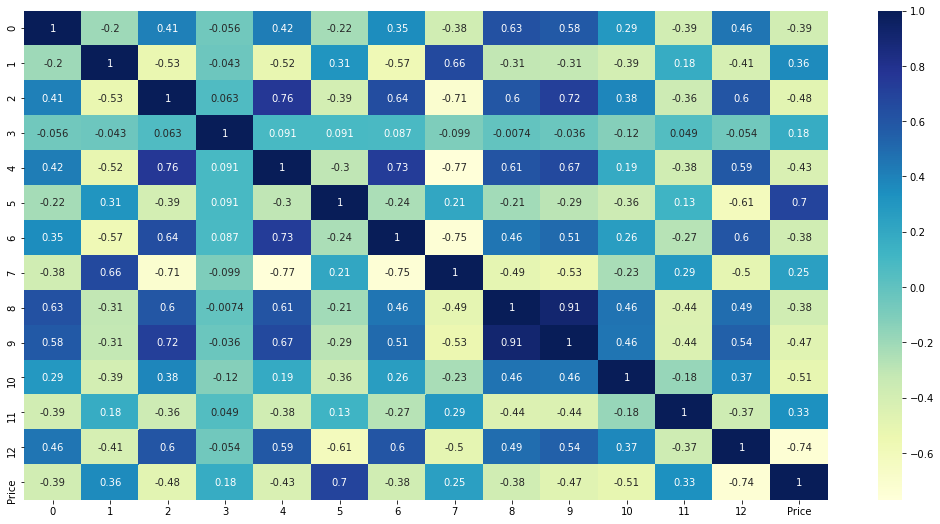

In [9]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

- Heatmaps show relationships between variables. These variables are plotted on both axes. We look for patterns in the cell by noticing the color change.
- light color means negative co-relation 
- green color means zero co-relation 
- dark color means positivr co-relation 

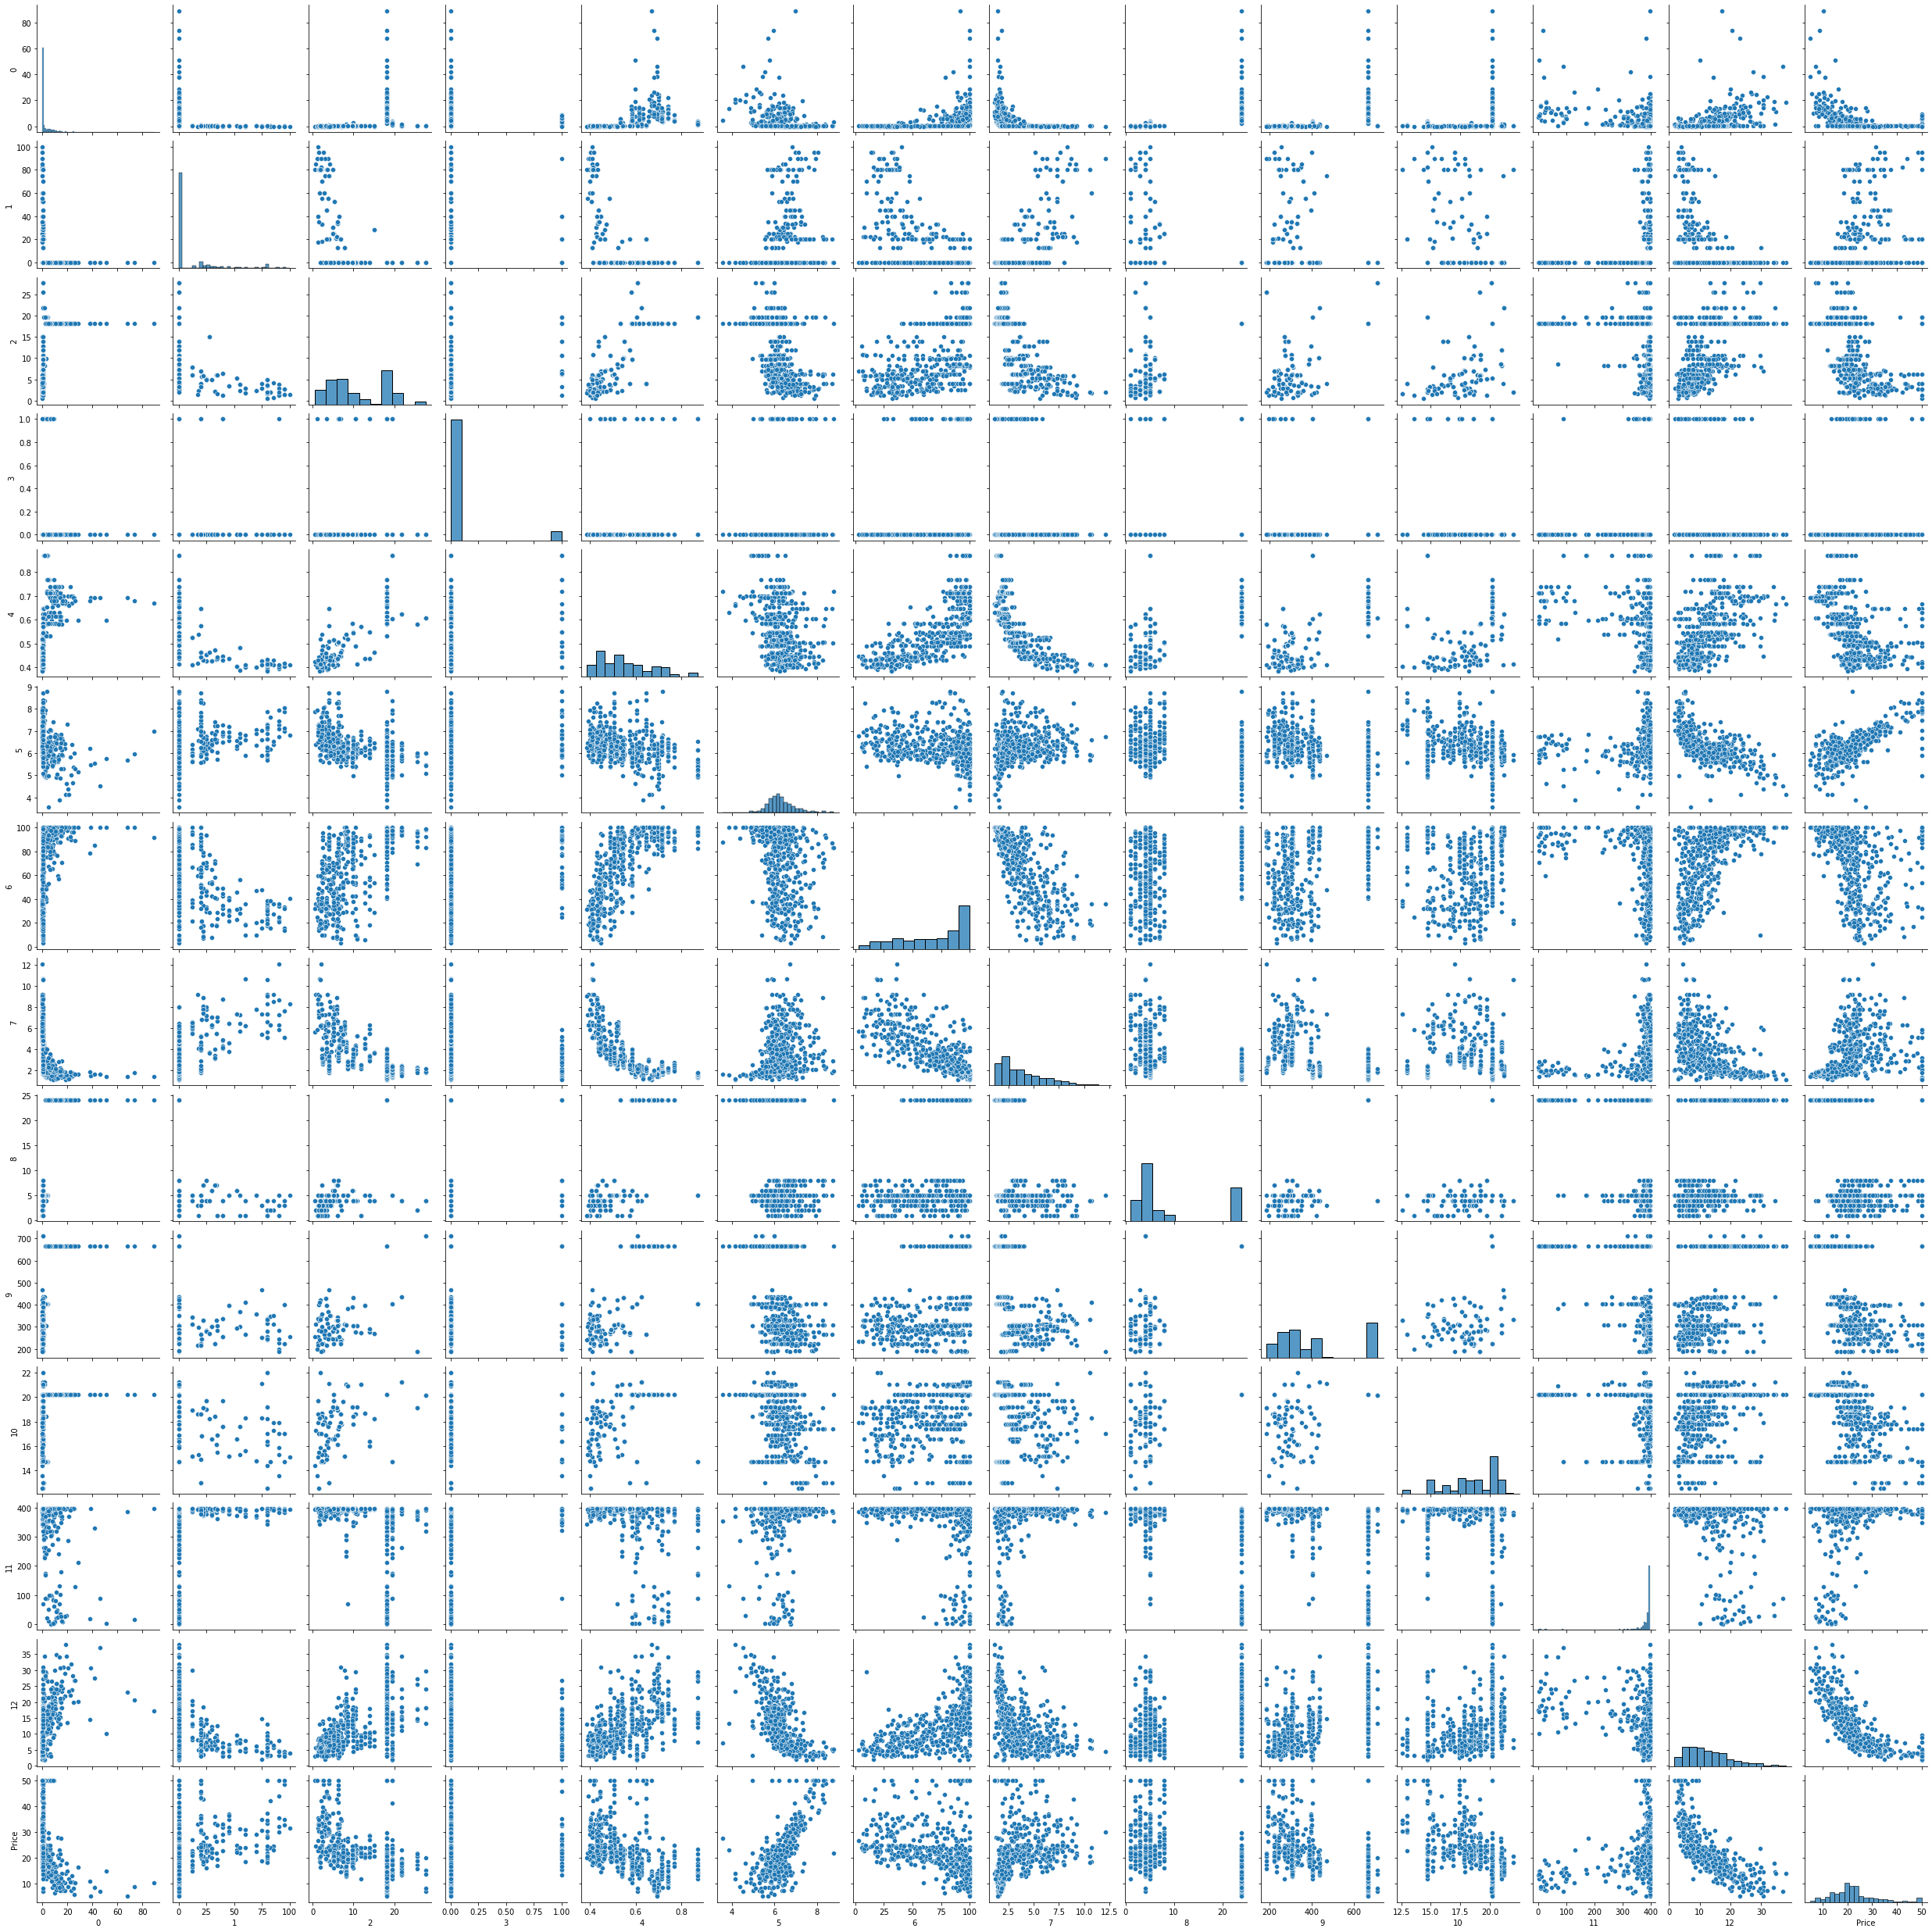

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Price'], dtype='object')

### the problem with pairplot is there are so many variable. so we will plot this thing seprately. 

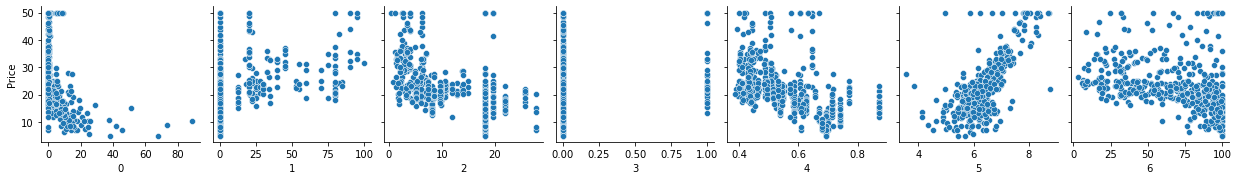

In [13]:
sns.pairplot(data = df,
            x_vars = [0, 1, 2, 3, 4, 5, 6],
            y_vars = 'Price')

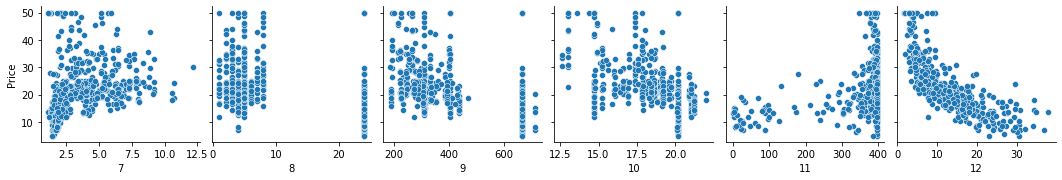

In [14]:
sns.pairplot(data = df,
            x_vars = [7, 8, 9, 10, 11, 12],
            y_vars = 'Price')

### There is a positive corelation in 5th column and very hig negative relation in 12th column

## 3.Data Preparation

In [15]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(404, 14)
(102, 14)


## 4. Training

In [16]:
y_train = df_train.pop('Price')
X_train = df_train

In [17]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 5. Residual Analysis on Training Data

In [20]:
y_train_pred = regressor.predict(X_train)

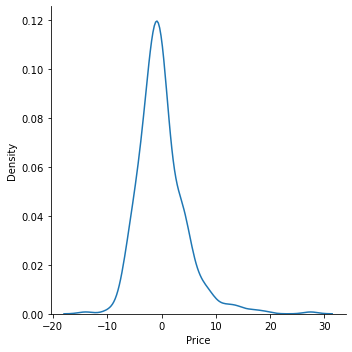

In [21]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

## 6. Making Prediction

In [22]:
y_test = df_test.pop('Price')
X_test = df_test

In [23]:
y_test_pred = regressor.predict(X_test)

In [24]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


## 7. Evaluation

In [25]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.8429092204444983
Mean Squared Error:  33.44897999767644
Root Mean Squared Error:  5.783509315085127


In [26]:
print(metrics.r2_score(y_test, y_test_pred))

0.5892223849182519


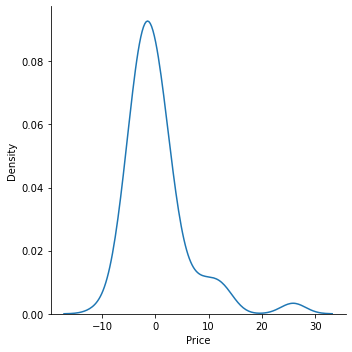

In [27]:
residual_test = y_test - y_test_pred

sns.displot(residual_test, kind='kde')

### For some points error is huge. mostly the error is close to 0

<AxesSubplot:xlabel='Price'>

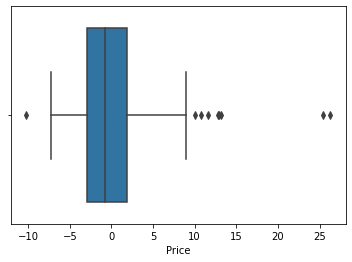

In [28]:
sns.boxplot(x=residual_test)

## 8. RFE - Recursive Feature Elimination

In [29]:
from sklearn.linear_model import LinearRegression
regressor_temp = LinearRegression()

In [30]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

In [31]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,0,False,3
1,1,False,5
2,2,False,8
3,3,True,1
4,4,True,1
5,5,True,1
6,6,False,9
7,7,True,1
8,8,False,4
9,9,False,6


In [32]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index([3, 4, 5, 7, 10], dtype='object')

In [33]:
X_train_new = df_train[imp_col]

X_train_new.head()

,3,4,5,7,10
220,1.0,0.507,6.951,2.8617,17.4
71,0.0,0.413,5.961,5.2873,19.2
240,0.0,0.428,6.897,6.3361,16.6
6,0.0,0.524,6.012,5.5605,15.2
417,0.0,0.679,5.304,1.6475,20.2


In [34]:
from sklearn.linear_model import LinearRegression
regressor_new = LinearRegression()
regressor_new.fit(X_train_new, y_train)

LinearRegression()

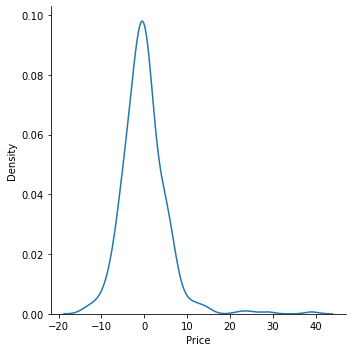

In [35]:
y_train_pred_new = regressor_new.predict(X_train_new)

residual = y_train - y_train_pred_new

sns.displot(residual, kind='kde')

In [36]:
X_test_new = df_test[imp_col]

y_test_pred_new = regressor_new.predict(X_test_new)

In [37]:
temp_df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_new})
temp_df_new

,Actual,Predicted
329,22.6,26.567018
371,50.0,19.167715
219,23.0,29.441997
403,8.3,11.172404
78,21.2,24.300583
...,...,...
56,24.7,24.746392
455,14.1,17.641942
60,18.7,17.476797
213,28.1,24.606665


In [38]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_new))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_new))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_new)))

Mean Absolute Error:  4.53265796864917
Mean Squared Error:  44.35034518051669
Root Mean Squared Error:  6.659605482347787


## we can see that PMSE value is close to 7 and its a good thing. earlier we had 13 columns and with the help of RFE we dropped like 8 columns and we worked on 5 columns. now our data is less complex 

In [39]:
print(metrics.r2_score(y_test, y_test_pred_new))

0.4553457527682314


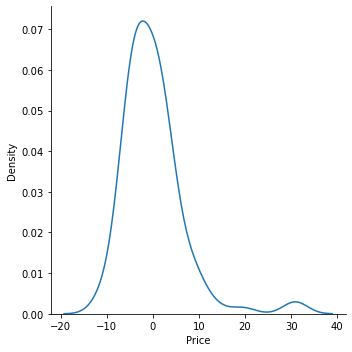

In [41]:
residual_test_new = y_test - y_test_pred_new


sns.displot(residual_test_new, kind='kde')

C:\Users\ani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

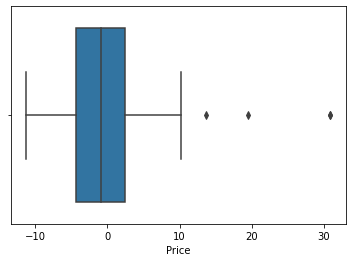

In [42]:
sns.boxplot(residual_test_new)

## Now we have less number of outliers compare to earlier 

## 9. Comparison of both the Models

In [43]:
res_df = pd.DataFrame({'res_test': residual_test, 'res_test_new': residual_test_new})

res_df.head()

,res_test,res_test_new
329,-2.289638,-3.967018
371,26.278589,30.832285
219,-6.364999,-6.441997
403,-3.822386,-2.872404
78,-0.243823,-3.100583


# Comparing both the boxplot 

<AxesSubplot:>

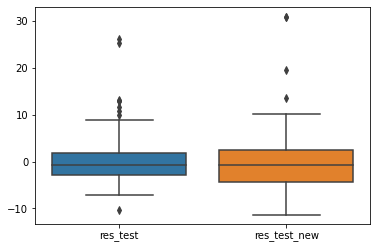

In [44]:
sns.boxplot(data = res_df)

### res_test contain 13 different features and res_test_new contain 5 different feature and hence we have less error 